In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Ensure inline plotting
%matplotlib inline

In [2]:
# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\corporate_stress_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [3]:
df.isnull().sum()

ID                                      0
Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                0
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      0
Remote_Work                             0
Stress_Level                            0
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               0
Manager_Support_Level                   0
Work_Pressure_Level                     0
Annual_Leaves_Taken                     0
Work_Life_Balance                       0
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                

In [4]:
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Company_Size', 'Department', 'Burnout_Symptoms', 'Location'], drop_first=True)

# Display the updated dataframe
df.head()

,ID,Age,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,Stress_Level,Sleep_Hours,Physical_Activity_Hours_per_Week,...,Department_Finance,Department_HR,Department_IT,Department_Marketing,Department_Sales,Burnout_Symptoms_Occasional,Burnout_Symptoms_Yes,Location_Tier-1,Location_Tier-2,Location_Tier-3
0,1,56,5,102703.08,44,1.72,True,0,5.6,1.9,...,False,False,False,True,False,False,False,False,False,True
1,2,46,20,165583.91,54,0.62,True,7,9.0,3.5,...,False,False,True,False,False,False,False,False,False,True
2,3,32,10,38005.39,81,1.22,False,7,7.9,8.4,...,False,True,False,False,False,False,True,False,False,False
3,4,60,26,51127.36,79,2.03,False,6,4.1,6.4,...,False,False,True,False,False,False,True,False,False,False
4,5,25,29,174597.45,63,1.45,True,8,4.0,9.2,...,False,False,False,False,True,False,False,True,False,False


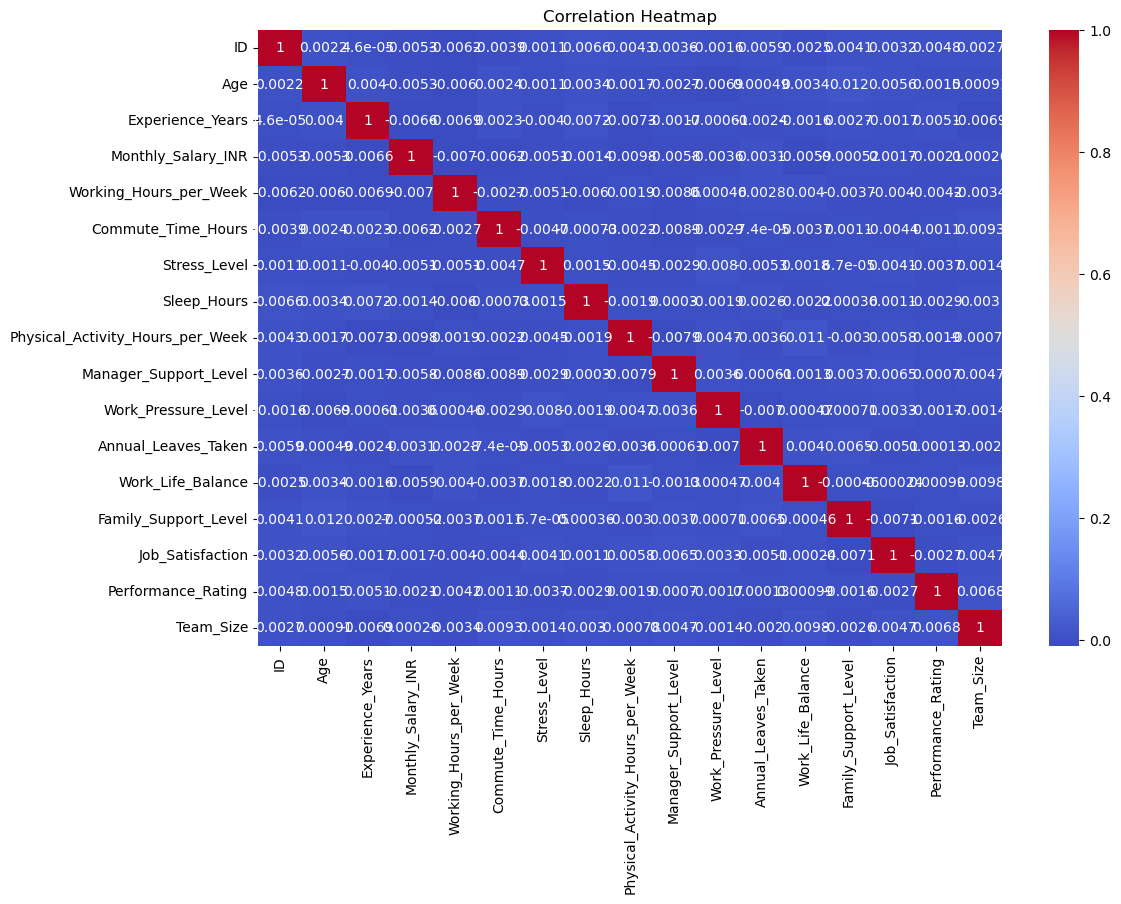

In [5]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

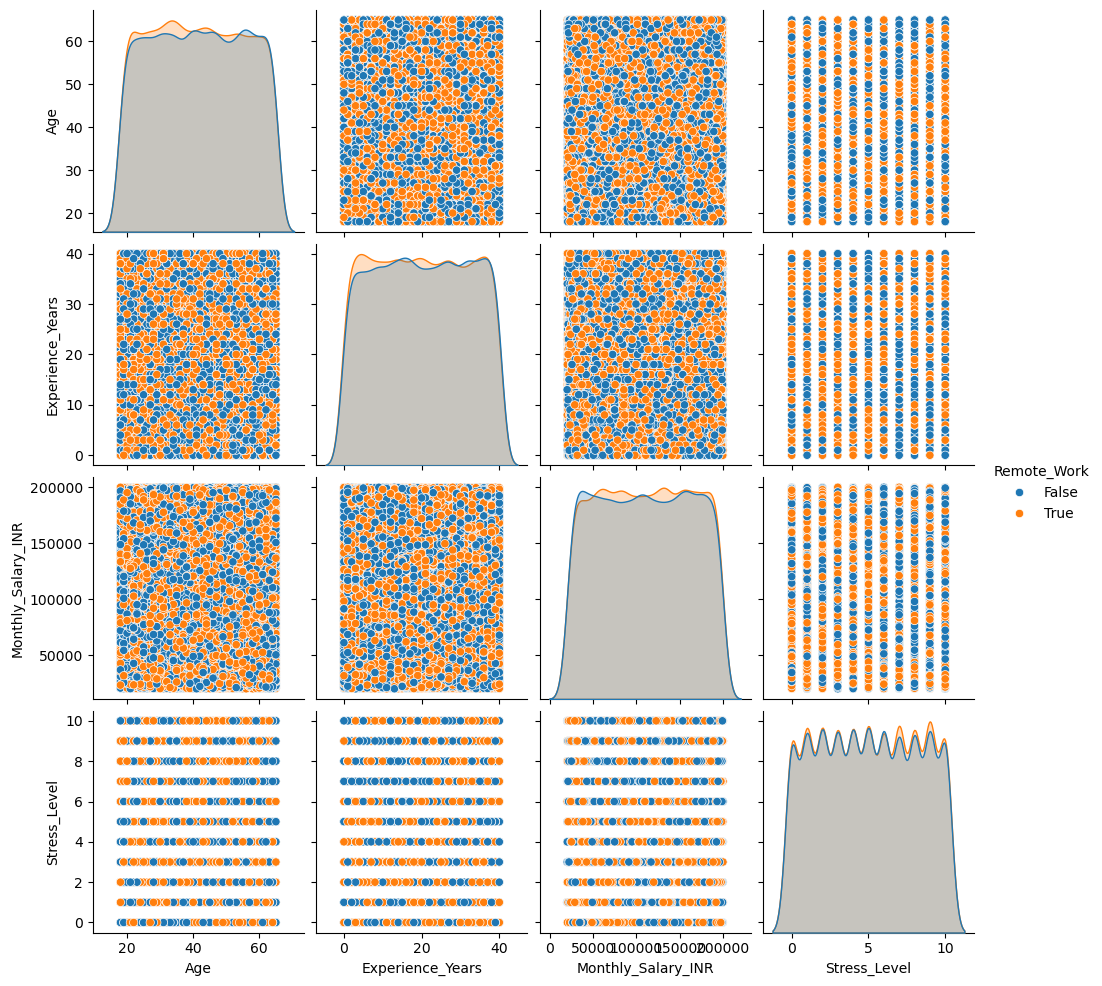

In [6]:
sns.pairplot(df, vars=['Age', 'Experience_Years', 'Monthly_Salary_INR', 'Stress_Level'], hue='Remote_Work')
plt.show()

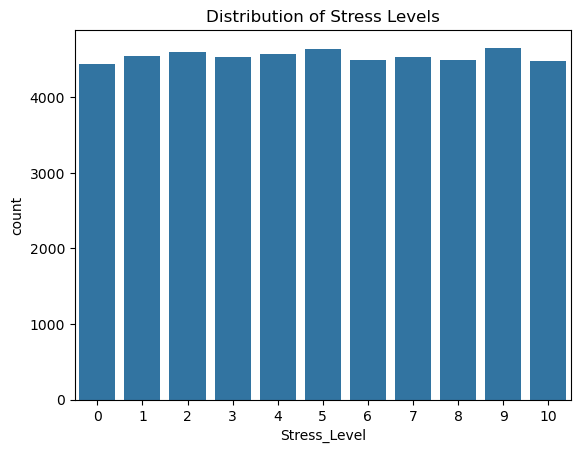

In [7]:
sns.countplot(x='Stress_Level', data=df)
plt.title('Distribution of Stress Levels')
plt.show()

In [8]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.0911,
 array([[ 87,  95,  95,  90,  91,  90,  70,  76,  61,  65,  57],
        [ 95, 109, 113,  73, 112,  83,  74,  79,  59,  80,  56],
        [111,  95,  96,  89,  94,  76,  79,  76,  64,  98,  59],
        [ 81,  96,  93,  90,  90,  75,  90,  76,  63,  91,  58],
        [ 93,  91, 107,  75, 103,  81,  75,  56,  68,  85,  67],
        [ 96, 110, 105,  86,  92,  91,  64,  78,  68,  74,  66],
        [ 82, 103,  93,  98,  95,  80,  67,  63,  65,  81,  67],
        [ 93,  75,  93,  83,  88,  77,  81,  79,  44,  91,  68],
        [107, 104, 100,  82,  76,  93,  76,  69,  56,  87,  57],
        [ 83, 117,  93,  82,  96,  72,  86,  77,  69,  78,  56],
        [101,  87, 111,  97,  99,  96,  57,  72,  74,  88,  55]],
       dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.08      0.10      0.09       877\n           1       0.10      0.12      0.11       933\n           2       0.09      0.10      0.09       937\n           3       0.10      0